<p> Jupyter Notebook est une application web open source</p>
<a>https://github.com/jupyter/notebook</a>

<p>Pour executer une cellule appuyer sur Shift + Enter, pour accéder aus raccourcis appuyer sur la touche H (echap + h si vous avez cliqué sur une cellule)</p>

<a><img src='https://blog.zenika.com/wp-content/uploads/2017/11/markblogtensorflow.png'/></a>

<p>Framework de machine learning open-source développé par Google</p>
<a>https://github.com/tensorflow/tensorflow</a>

In [1]:
import tensorflow as tf
print (tf.__version__)

1.12.0


<a><img src='https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png'/></a>

<p>Bibliothèque de machine learning surcouche de framework comme Tensorflow (Google), Theano (McGill et Montréal), CNTK(Microsoft)</p>

In [2]:
import keras as K
print (K.__version__)

2.2.4


Using TensorFlow backend.


In [3]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device = device_lib.list_local_devices()
#     print (local_device)
    return [x.name for x in local_device if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [6]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
import cv2 as cv
%pylab inline

import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU

Populating the interactive namespace from numpy and matplotlib


<h1>Classification CIFAR10</h1>

In [7]:
from keras.datasets import cifar10
#cifar 10
#cifar 100
#imdb movie reviews
#mnist
#fashion mnist
#boston housing price

In [8]:
NB_CIFAR = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

<a>https://keras.io/datasets/<a/>

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


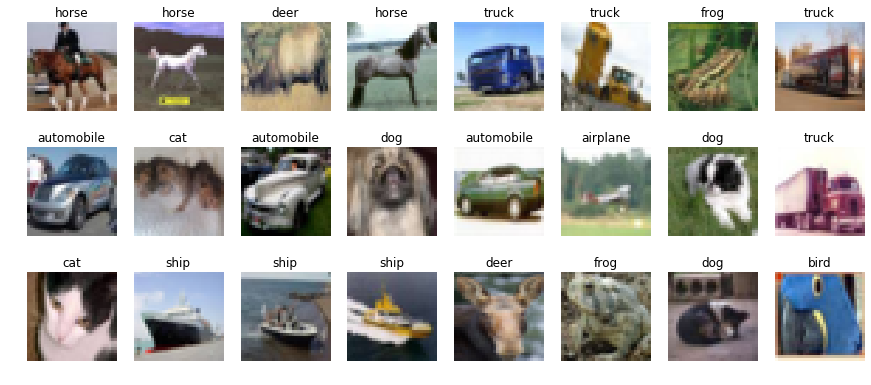

In [10]:
cols = 8
rows = 3
#pour allouer un cadre
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        #on place chacune des images sur le cadre
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

<a>https://matplotlib.org/</a>

In [11]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [12]:
# normaliser les entrées 
x_train2 = x_train / 255 - 0.5
x_test2 = x_test / 255 - 0.5

# transformer les labels en une representation vectorielle binaire avec un 1 correspondant au label
y_train2 = keras.utils.to_categorical(y_train, num_classes=10)
y_test2 = keras.utils.to_categorical(y_test, num_classes=10)

In [13]:
for ind, (lb, enc) in enumerate(zip(y_train, y_train2)):
    print ("Avant: {}, après: {}".format(lb, enc))
    if ind > 10:
        break ;

Avant: [6], après: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Avant: [9], après: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Avant: [9], après: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Avant: [4], après: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Avant: [1], après: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Avant: [1], après: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Avant: [2], après: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Avant: [7], après: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Avant: [8], après: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Avant: [3], après: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Avant: [4], après: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Avant: [7], après: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<a>https://stats.stackexchange.com/questions/185853/why-do-we-need-to-normalize-the-images-before-we-put-them-into-cnn</a>

In [14]:
from IPython.display import HTML, display

In [15]:
display(HTML("<table><tr><td>sigmoid<img src='https://cdn-images-1.medium.com/max/1600/1*sOtpVYq2Msjxz51XMn1QSA.png'/></td><td>tanh<img src='http://mathworld.wolfram.com/images/interactive/TanhReal.gif'><td/><td>leakyRelu<img src='https://qph.fs.quoracdn.net/main-qimg-810df1b8981a83fd719c1085f74b4205.webp'></td><td>Relu<img src='https://qph.fs.quoracdn.net/main-qimg-7ea942ca853d1420fe3d604982d42f76'></td></tr></table>"))

sigmoid,tanhleakyRelu,Relu


<img src='https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png' />

In [16]:
def create_model_leaky(num_classes):
    model = Sequential() # Permet de configurer votre model pour l'entrainement

    model.add(Conv2D(16, (3, 3), input_shape=(32,32,3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, name='predictions'))
    model.add(Activation("softmax"))
    return model

In [17]:
def create_model_relu(num_classes):
    model = Sequential() 

    model.add(Conv2D(16, (3, 3), input_shape=(32,32,3), padding="same", activation='relu'))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation("softmax"))
    return model

<p>Les deux architectures ont des performances quasi-similaire, l'objectif est de montrer comment utiliser LeakyRelu qui est de plus en plus utilisé</p>

<a>https://www.quora.com/What-is-max-pooling-in-convolutional-neural-networks</a>

<a>https://github.com/shekkizh/neuralnetworks.thought-experiments/blob/master/Activations/Readme.md</a>

In [18]:
K.clear_session()
model = create_model_leaky(NB_CIFAR)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [19]:
INIT_LR = 5e-3 #learning rate 
BATCH_SIZE = 32
EPOCHS = 10

K.clear_session()
model = create_model_leaky(NB_CIFAR)  

In [20]:
# afficher toutes les methodes, décommenter le code ci-dessous
# [method_name for method_name in dir(model)
#  if callable(getattr(model, method_name))]

<a>https://docs.python.org/2/library/functions.html</a>

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [23]:
# Prepare le model pour l'entrainement
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.adamax(lr=INIT_LR), 
#     'Adam'
    metrics=['accuracy']  # afficher l'accuracy pendant le training
)

<p>Pour les fonctions d'objectifs (losses functtions)</p>
<a>https://keras.io/losses/</a>
<p>Pour les différentes méthodes de descente de gradient</p>
<a>https://keras.io/optimizers/</a>
<p>Metrics</p>
<a>https://keras.io/metrics/</a>

In [28]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
filepath = 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [29]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [30]:
earlyStp = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=5, verbose=1, mode='auto')

In [31]:
# ainsi que des architectures plus avancées tels que Resnet ou bien l'inceptionV3, les liens ci-dessous
# chaque epoch on baisse la learning rate
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback pour afficher la learning rate
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

# l'entrainement du model
history = model.fit(
    x_train2, y_train2,  # les datas
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), LrHistory(), earlyStp, reduce_lr, checkpoint],
    validation_data=(x_test2, y_test2), 
    shuffle=True,
    verbose=1
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
Learning rate: 0.005
50000/50000 [==============================] - 17s 345us/step - loss: 1.3483 - acc: 0.5123 - val_loss: 0.9852 - val_acc: 0.6559

Epoch 00001: val_acc improved from -inf to 0.65590, saving model to weights.01-0.99.hdf5
Epoch 2/10
Learning rate: 0.0045
50000/50000 [==============================] - 15s 298us/step - loss: 0.9554 - acc: 0.6657 - val_loss: 0.8318 - val_acc: 0.7113

Epoch 00002: val_acc improved from 0.65590 to 0.71130, saving model to weights.02-0.83.hdf5
Epoch 3/10
Learning rate: 0.00405
50000/50000 [==============================] - 15s 304us/step - loss: 0.8205 - acc: 0.7139 - val_loss: 0.7531 - val_acc: 0.7409

Epoch 00003: val_acc improved from 0.71130 to 0.74090, saving model to weights.03-0.75.hdf5
Epoch 4/10
Learning rate: 0.003645
50000/50000 [==============================] - 15s 298us/step - loss: 0.7330 - acc: 0.7446 - val_loss: 0.7165 - val_acc: 0.7506

Epoch 00004: val_acc improv

<a>https://keras.io/callbacks/</a>

<a>https://keras.io/applications/</a>

In [32]:
model.save_weights("weights_cifar10.h5")

In [33]:
model.load_weights("weights_cifar10.h5")

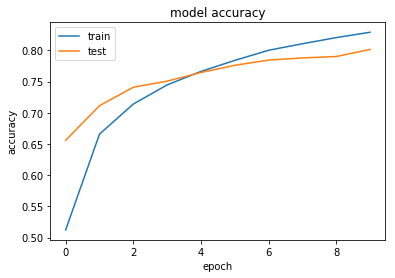

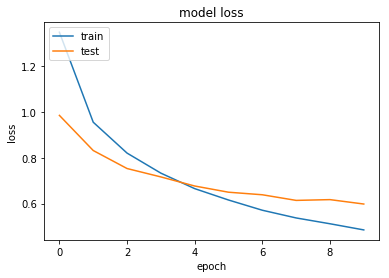

In [34]:
# historique pour l'accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# historique pour la loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
#prediction de la totalite du dataset de test
#on peut utiliser la methode predict pour un seul element
y_pred_test = model.predict_proba(x_test2)
#la classe des maximums
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
#la probabilite des maximums
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

<a>https://keras.io/models/sequential/</a>

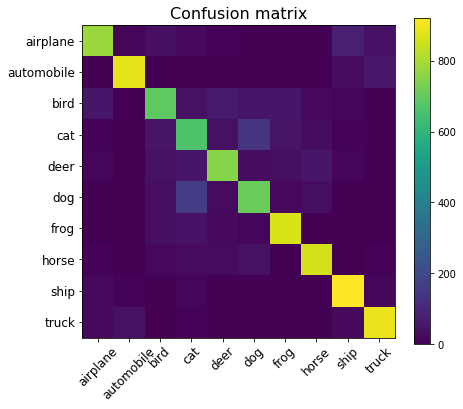

Test accuracy: 0.8014


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

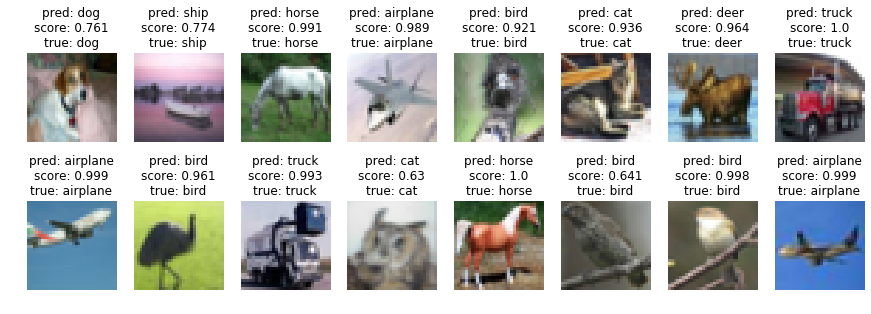

In [37]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

In [38]:
K.clear_session() 
K.set_learning_phase(0)  # enlever dropout
model = create_model_leaky(NB_CIFAR)
model.load_weights("weights_cifar10.h5")

<p>le code pour visualiser la maximisation de l'activation des filtres, a été pris sur un cours de Yandex de deep learning que vous pouvez trouver sur Coursera, je reviendrais sur le code à l'un des prochains ateliers</p>
<a>https://www.coursera.org/learn/intro-to-deep-learning</a>

In [39]:
def find_maximum_stimuli(layer_name, is_conv, filter_index, model, iterations=20, step=1., verbose=True):
    
    def image_values_to_rgb(x):
        # normalize x: center on 0 (np.mean(x_train2)), ensure std is 0.25 (np.std(x_train2))
        # so that it looks like a normalized image input for our network
        x = (x - np.mean(x_train2)) / np.std(x_train2) ### YOUR CODE HERE
        # do reverse normalization to RGB values: x = (x_norm + 0.5) * 255
        x = (x + 0.5) * 255 ### YOUR CODE HERE
    
        # clip values to [0, 255] and convert to bytes
        x = np.clip(x, 0, 255).astype('uint8')
        return x

    # this is the placeholder for the input image
    input_img = model.input
    img_width, img_height = input_img.shape.as_list()[1:3]
    
    # find the layer output by name
    layer_output = list(filter(lambda x: x.name == layer_name, model.layers))[0].output

    # we build a loss function that maximizes the activation
    # of the filter_index filter of the layer considered
    if is_conv:
        # mean over feature map values for convolutional layer
        loss = K.mean(layer_output[:, :, :, filter_index])
    else:
        loss = K.mean(layer_output[:, filter_index])

    # we compute the gradient of the loss wrt input image
    grads = K.gradients(loss, input_img)[0]  # [0] because of the batch dimension!

    # normalization trick: we normalize the gradient
    grads = grads / (K.sqrt(K.sum(K.square(grads))) + 1e-10)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # we start from a gray image with some random noise
    input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * (0.1 if is_conv else 0.001)

    # we run gradient ascent
    for i in range(iterations):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        if verbose:
            print('Current loss value:', loss_value)

    # decode the resulting input image
    img = image_values_to_rgb(input_img_data[0])
    
    return img, loss_value

In [40]:
# sample maximum stimuli
def plot_filters_stimuli(layer_name, is_conv, model, iterations=20, step=1., verbose=False):
    cols = 8
    rows = 2
    filter_index = 0
    max_filter_index = list(filter(lambda x: x.name == layer_name, model.layers))[0].output.shape.as_list()[-1] - 1
    fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
    for i in range(cols):
        for j in range(rows):
            if filter_index <= max_filter_index:
                ax = fig.add_subplot(rows, cols, i * rows + j + 1)
                ax.grid('off')
                ax.axis('off')
                loss = -1e20
                while loss < 0 and filter_index <= max_filter_index:
                    stimuli, loss = find_maximum_stimuli(layer_name, is_conv, filter_index, model,
                                                         iterations, step, verbose=verbose)
                    filter_index += 1
                if loss > 0:
                    ax.imshow(stimuli)
                    ax.set_title("Filter #{}".format(filter_index))
    plt.show()

leaky_re_lu_1


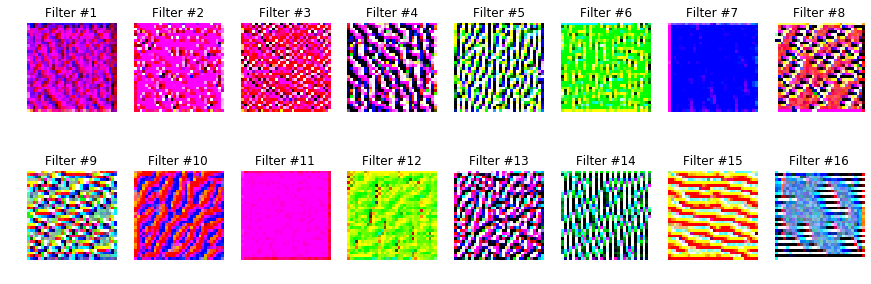

leaky_re_lu_2


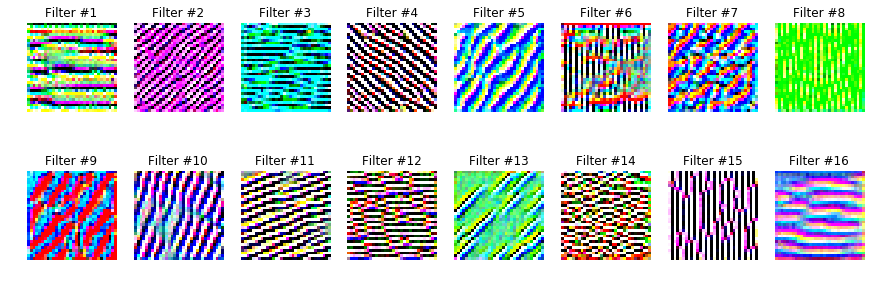

leaky_re_lu_3


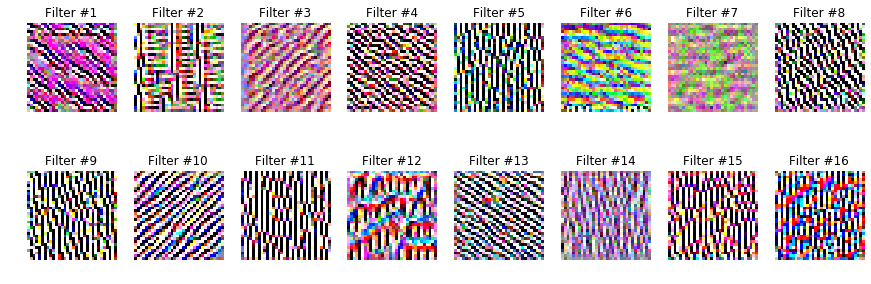

leaky_re_lu_4


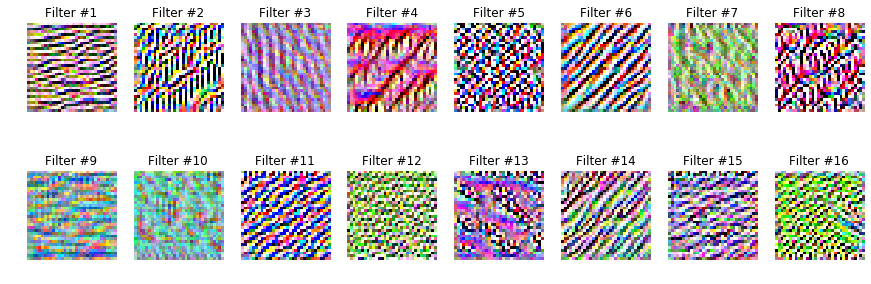

In [89]:
conv_activation_layers = []
for layer in model.layers:
    if isinstance(layer, LeakyReLU):
        prev_layer = layer._inbound_nodes[0].inbound_layers[0]
        if isinstance(prev_layer, Conv2D):
            conv_activation_layers.append(layer)

for layer in conv_activation_layers:
    print(layer.name)
    plot_filters_stimuli(layer_name=layer.name, is_conv=True, model=model)

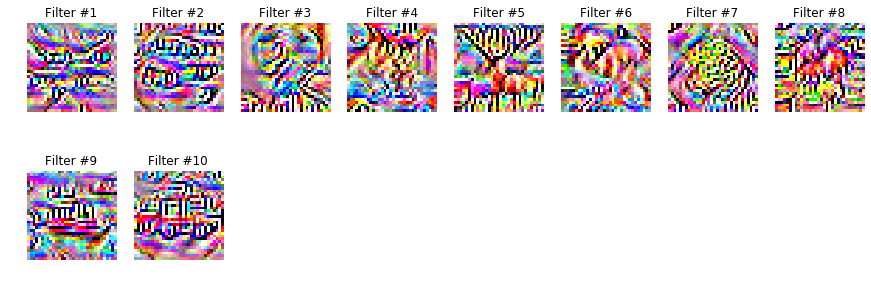

In [90]:
# maximum stimuli for last dense layer
last_dense_layer = list(filter(lambda x: isinstance(x, Dense), model.layers))[-1]
plot_filters_stimuli(layer_name=last_dense_layer.name, is_conv=False, 
                     iterations=200, step=0.1, model=model)

In [33]:
print (cifar10_classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<h1>Ressources</h1>

<p>Chaine youtube à suivre</p>
<p><a>https://www.youtube.com/user/keeroyz</a></p>
<a>https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw</a>

<p>Un excellent cours en ligne sur le deeplearning</p><a>https://www.coursera.org/specializations/deep-learning</a>

<p>Gpu google gratos</p><a>https://colab.research.google.com/notebooks/welcome.ipynb#recent=true</a>

<p>Pour toutes questions sur les ateliers je suis joignable sur le slack du 42ai mon login: <b>eozdek</b></p>